# Aula 5 - Espaços de features polinomiais - aumentando a complexidade de hipóteses

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Espaços de features polinomiais

In [1]:
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
from ml_utils import *

In [3]:
dir()

['In',
 'LinearRegression',
 'MinMaxScaler',
 'Out',
 'PolynomialFeatures',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'calc_r2_adj',
 'calc_reg_metrics',
 'exit',
 'get_ipython',
 'json',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'mean_squared_error',
 'np',
 'pd',
 'plot_reglin_model',
 'plot_scatter_real_pred',
 'plt',
 'quit',
 'r2_score',
 'reg_lin_poly_features',
 'reg_lin_pt1_pt2',
 'sns',
 'train_test_split',
 'yapf_reformat']

____
____
____

_____

## 1) Espaços de features polinomiais

Muitas vezes, temos dados que simplesmente não se ajustam às hipóteses simples, lineares, que conhecemos até o momento.

Quando isso acontece, é muito provável que soframos **underfitting**, pois uma forma funcional demasiadamente simples de uma hipótese pode não ser capaz de capturar o comportamento de uma função teórica $\mathcal{F}$ mais complexa, conforme refletido pela amostra.

Nestes casos, a solução é simples: basta escolhermos hipóteses mais complexas!

Pra começar nosso estudo, vamos utilizar dados artificiais bem simples: 


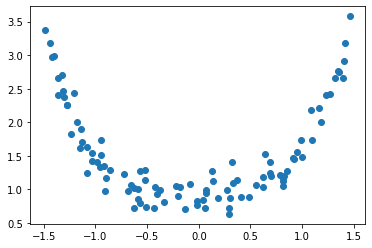

In [7]:
np.random.seed(42)

N = 100
X = np.random.uniform(-1.5, 1.5, N)

b0, b1, b2, b3, b4 = 1, 0.1, 0, 0, 0.5
y = b0 + b1*X + b2*(X**2) + b3*(X**3) + b4*(X**4) + np.random.normal(0, 0.2, N)

plt.scatter(X, y)
plt.show()

Como estamos com uma única feature, vamos aplicar o reshape já agora!

In [10]:
X = X.reshape(-1, 1)

Podemos fazer uma regressão linear...

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
pd.Series(y_test).describe()

count    30.000000
mean      1.777795
std       0.796346
min       0.895135
25%       1.083746
50%       1.497048
75%       2.243756
max       3.578406
dtype: float64

In [15]:
reglin_1 = reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, 
                           plot=False, scale_mms=False, 
                           train_metrics=True, dist_resids=False)


Métricas de avaliação (dados de treino):

R^2: 0.00 | Adj R^2: -0.01
MAE: 0.53
RMSE: 0.66
MAPE: 40.53%

##################################################

Métricas de avaliação (dados de teste):

R^2: -0.21 | Adj R^2: -0.25
MAE: 0.63
RMSE: 0.86
MAPE: 32.37%


In [18]:
reglin_1.intercept_

1.4269234282644585

In [19]:
reglin_1.coef_

array([0.01977083])

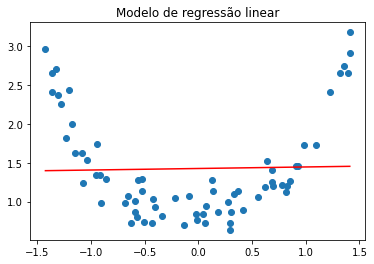

In [20]:
plot_reglin_model(reglin_1, X_train, y_train)

Naturalmente, temos métricas bem ruins, dada a escolha ruim de hipótese!

Hipótese atual:

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x$$

Vamos fazer algo melhor: como nossos dados são aproximadamente quadráticos, faria sentido escolher uma **hipótese quadrática**, não é mesmo? Isto é,

$$f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$$

E é aqui que entra um dos aspectos mais importantes de um modelo linear como a regressão linear: **o modelo é linear nos parâmetros, não necessariamente nas features!**

Ou seja, o termo quadrático que incluímos **pode ser considerado como uma nova feature linear**. Para ver isso, basta definir $z \equiv x^2$, que voltamos a ter uma hipótese linear, mas agora em duas variáveis:

$$f_{h, \  \vec{b}}(x, z) = b_0 + b_1x + b_2z$$

Ou seja, ainda temos uma regressão linear (múltipla, agora).

E isso é verdade para **qualquer** combinação de features que possamos criar!

________

Um outro exemplo: considere uma hipótese linear para um modelo com duas features $x_1, x_2$:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2$$

Caso queiramos produzir um modelo quadrático, temos que incluir os termos $x_1^2, x_2^2$ e também $x_1x_2$ (que também é quadrático), de modo que nossa hipótese fica sendo:

$$f_{h, \  \vec{b}}(x_1, x_2) = b_0 + b_1x_1 + b_2x_2 + b_3 x_1^2 + b_4 x_2^2 + b_5 x_1 x_2$$

O que não deixa de ser uma **regressão linear múltipla** de 5 variáveis ($x_3 \equiv x_1^2$, $x_4 \equiv x_2^2$ e $x_5 \equiv x_1x_2$):

$$f_{h, \  \vec{b}}(x_1, x_2, x_3, x_4, x_5) = b_0 + b_1x_1 + b_2x_2 + b_3 x_3 + b_4 x_4 + b_5 x_5$$

E assim por diante! ;)

Assim, para criarmos um modelo quadrático para nossos dados, bastaria criarmos uma nova feature $z = x^2$, e passar apenas esta nova feature para o  modelo de regressão linear **simples**. Isso equivale a usar uma hipótese $$f_{h, \  \vec{b}}(z) = b_0 + b_1z = b_0 + b_1x^2$$

Vejamos:

In [22]:
Z = X**2

In [27]:
# note que eu to usando como features o Z!
X_train_quad, X_test_quad, y_train, y_test = train_test_split(Z, y, test_size=0.3, random_state=42)

reglin_2 = reg_lin_pt1_pt2(X_train_quad, y_train, X_test_quad, y_test, 
                           plot=False, scale_mms=False, 
                           train_metrics=True, dist_resids=False)


Métricas de avaliação (dados de treino):

R^2: 0.87 | Adj R^2: 0.87
MAE: 0.19
RMSE: 0.24
MAPE: 15.30%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.86 | Adj R^2: 0.85
MAE: 0.24
RMSE: 0.29
MAPE: 14.20%


No espaço transformado, esse foi o modelo treinado:

$f_{h, \  \vec{b}}(z) = b_0 + b_1z$

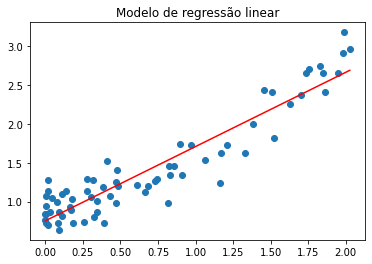

In [31]:
plt.title("Modelo de regressão linear")

plt.scatter(X_train_quad, y_train)

x_plot_modelo = np.linspace(X_train_quad.min(), X_train_quad.max(), 100000)

y_plot_modelo = reglin_2.intercept_ + reglin_2.coef_[0]*x_plot_modelo

plt.plot(x_plot_modelo, y_plot_modelo, color="red")
plt.show()

Mas, no espaço original, o modelo foi esse:

$f_{h, \  \vec{b}}(x) = b_0 + b_1x^2$

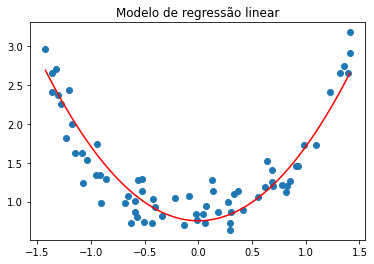

In [32]:
plt.title("Modelo de regressão linear")

plt.scatter(X_train, y_train)

x_plot_modelo = np.linspace(X_train.min(), X_train.max(), 100000)

y_plot_modelo = reglin_2.intercept_ + reglin_2.coef_[0]*(x_plot_modelo**2)

plt.plot(x_plot_modelo, y_plot_modelo, color="red")
plt.show()

Agora sim, um modelo beeem melhor!!

E se quisermos usar a hipótese quadrática mais completa, com ambos os termos linear e quadrático? (Isto é, $f_{h, \  \vec{b}}(x) = b_0 + b_1x + b_2x^2$)

Bem simples: basta passarmos as duas features pro sklearn:

In [36]:
X_train_df = pd.DataFrame(X, columns=["X"])

X_train_df

,X
0,-0.376380
1,1.352143
2,0.695982
3,0.295975
4,-1.031944
...,...
95,-0.018613
96,0.068198
97,-0.217377
98,-1.423743


In [37]:
X_train_df["Z"] = X_train_df["X"]**2

In [38]:
X_train_df

,X,Z
0,-0.376380,0.141662
1,1.352143,1.828290
2,0.695982,0.484391
3,0.295975,0.087601
4,-1.031944,1.064909
...,...,...
95,-0.018613,0.000346
96,0.068198,0.004651
97,-0.217377,0.047253
98,-1.423743,2.027043


No espaço transformado, treinaríamos o seguinte modelo:

$f_{h, \  \vec{b}}(x, z) = b_0 + b_1x + b_2z$

Isso é um plano!

Mas, no espaço original, o modelo projetado seria esse:

$f_{h, \  \vec{b}}(x) = b_0 + b_2x + b_2x^2$

Uma hipótese quadrática genérica!

In [ ]:
# treinar o modelo em casa "manualmente", caso queira

No entanto, lembre que geramos os dados de acordo com um processo teório de grau 4! Então, seria legal que nossa hipótese tbm fosse de grau 4, nao é mesmo?

E isso é possível!

No geral, dá pra ir aumentando a ordem dos polinomios criando features de ordem maior uma a uma:

In [39]:
X_train_df["A"] = X_train_df["X"]**3
X_train_df["B"] = X_train_df["X"]**4

In [40]:
X_train_df

,X,Z,A,B
0,-0.376380,0.141662,-0.053319,2.006802e-02
1,1.352143,1.828290,2.472110,3.342646e+00
2,0.695982,0.484391,0.337127,2.346344e-01
3,0.295975,0.087601,0.025928,7.674017e-03
4,-1.031944,1.064909,-1.098926,1.134030e+00
...,...,...,...,...
95,-0.018613,0.000346,-0.000006,1.200287e-07
96,0.068198,0.004651,0.000317,2.163212e-05
97,-0.217377,0.047253,-0.010272,2.232821e-03
98,-1.423743,2.027043,-2.885988,4.108904e+00


E aí, bastaria utilizar este df pra treinar o modelo!

In [ ]:
# treinar o modelo em casa "manualmente", caso queira

Mas esse é um procedimento bem manual. Pra nossa sorte, o sklearn existe, e uma de suas muitas ferramentas especiais para machine learning (no caso, pré-processamento) é o [polynomial features](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), que permite a criação de toda as combinações polinomiais de features automaticamente!

O PolynomialFeatures é nosso primeiro exemplo de **transformer** do sklearn - um método cujo objetivo é aplicar alguma **transformação** aos dados. Veremos vários outros exemplos de transformers durante o curso.

Em particular, todos os transformers se comportam como se fossem "estimadores", no sentido de que eles devem 
ser "ajustados" aos dados -- por isso, eles também têm o método `.fit()` -- que ajusta o transformer aos dados; além do método `.transform()`, que efetivamente transforma os dados. Existe também o `.fit_transform()`, que faz as duas coisas ao mesmo tempo -- mas vamos evitar de usá-lo, por motivos que ficarão claros no futuro próximo (data leakage).

Lembre-se de fitar o transformados sempre nos dados de treino, apenas!

Vejamos o uso da classe:

In [44]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=4, include_bias=False).fit(X_train)

In [45]:
vars(pf)

{'degree': 4,
 'interaction_only': False,
 'include_bias': False,
 'order': 'C',
 'n_features_in_': 1,
 '_min_degree': 0,
 '_max_degree': 4,
 'n_output_features_': 4,
 '_n_out_full': 4}

In [47]:
pd.DataFrame(pf.transform(X_train))

,0,1,2,3
0,1.409730,1.987337,2.801608,3.949510
1,0.060204,0.003625,0.000218,0.000013
2,-0.524450,0.275048,-0.144249,0.075651
3,0.277244,0.076864,0.021310,0.005908
4,0.183832,0.033794,0.006212,0.001142
...,...,...,...,...
65,-0.333968,0.111535,-0.037249,0.012440
66,-0.903853,0.816950,-0.738403,0.667408
67,-0.954525,0.911118,-0.869685,0.830136
68,0.782355,0.612080,0.478864,0.374641


Vamos generalizar nosss funções (veja no .py a definição da nova função `reg_lin_poly_features`)


Métricas de avaliação (dados de treino):

R^2: 0.00 | Adj R^2: -0.01
MAE: 0.53
RMSE: 0.66
MAPE: 40.53%

##################################################

Métricas de avaliação (dados de teste):

R^2: -0.21 | Adj R^2: -0.25
MAE: 0.63
RMSE: 0.86
MAPE: 32.37%


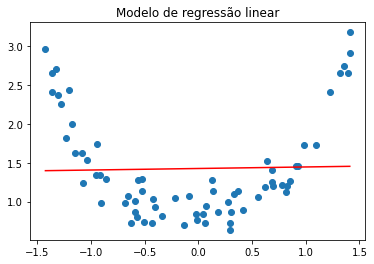

In [50]:
_ = reg_lin_poly_features(X_train, y_train, X_test, y_test, 
                          deg=1,
                          plot=False, scale_mms=False, 
                          train_metrics=True, 
                          dist_resids=False,
                          plot_model=True)

Modelo com espaço de features transformado!

Número de features original: 1
Número de features após o transformer: 2


Métricas de avaliação (dados de treino):

R^2: 0.89 | Adj R^2: 0.88
MAE: 0.18
RMSE: 0.22
MAPE: 14.49%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.86 | Adj R^2: 0.85
MAE: 0.23
RMSE: 0.29
MAPE: 14.17%


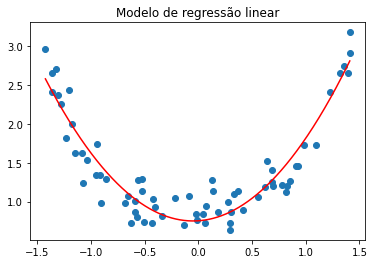

In [51]:
_ = reg_lin_poly_features(X_train, y_train, X_test, y_test, 
                          deg=2,
                          plot=False, scale_mms=False, 
                          train_metrics=True, 
                          dist_resids=False,
                          plot_model=True)

Modelo com espaço de features transformado!

Número de features original: 1
Número de features após o transformer: 4


Métricas de avaliação (dados de treino):

R^2: 0.92 | Adj R^2: 0.92
MAE: 0.14
RMSE: 0.18
MAPE: 12.24%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.95 | Adj R^2: 0.95
MAE: 0.13
RMSE: 0.17
MAPE: 8.53%


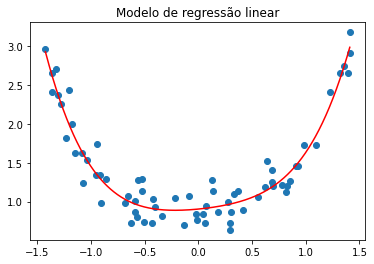

In [52]:
_ = reg_lin_poly_features(X_train, y_train, X_test, y_test, 
                          deg=4,
                          plot=False, scale_mms=False, 
                          train_metrics=True, 
                          dist_resids=False,
                          plot_model=True)

Em aulas anteriores, discutimos sobre a **maldição da dimensionalidade**, e como é fácil overfitar um modelo ao aumentarmos a dimensionalidade (dado o correspondente aumento da complexidade da hipótese).

Vamos ver isso claramente, e fazer o plot do tradeoff viés-variância?

_____________
_____________
_____________

Agora que já entendemos a técnica em um dataset bem simples, vamos voltar pra um dataset real!

Vamos voltar pros dados da precificação de casas -- ali, o poly_features se mostrará ainda mais útil!

In [ ]:
df = pd.read_csv("../datasets/house_prices.csv")

X = df.drop(columns=["Id", "SalePrice"])
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_model = X_train.select_dtypes(include=np.number).dropna(axis="columns")
X_test_model = X_test.loc[:, X_train_model.columns]

Estes dois últimos modelos têm muuuuuito mais parametros que observações, portanto, aprenderam perfeitamente até mesmo os ruidos da base de treino!!

**Claro overfitting!**

Nossas hipóteses foram:

$$ f_{H, \vec{b}}(\vec{x}) = b_0 + b_1x_1 + b_2x_2 + \cdots + b_{594} x_{594}$$

pro primeiro modelo (features quadráticas); e, para o segundo (features cúbicas):

$$ f_{H, \vec{b}}(\vec{x}) = b_0 + b_1x_1 + b_2x_2 + \cdots + b_{7139} x_{7139}$$

Ou seja, temos um modelo **com muitos parâmetros**, ou seja, **muito complexo!**

Com tantos parâmetros assim, há muitos **graus de liberdade** pra que a hipótese se ajuste até às particularidades da base de treino... 

O resultado é evidente: temos um modelo altamente **overfitado**, dado o número enorme de features após o transformer -- e isso porque estamos utilizando apenas features quadráticas e cúbicas, imagine se tivéssemos usado features de grau maior!

É de se imaginar que muitas destas features não deveriam estar aí, não é mesmo?

Oras, uma forma interessante de eliminar features é fazendo o que chamamos de **feature selection**.

A ideia é a seguinte: gostaríamos sim de introduzir features polinomiais, aumentando um pouco a complexidade da hipótese, **mas não tanto!**. 

E é isso que conseguiremos fazer com as técnicas de **regularização**, que aprenderemos na próxima aula!

____
____
____